In [2]:
import numpy as np
import pandas as pd
import folium
import branca.colormap as cm
# numpy 소수점 4째자리까지 표현
np.set_printoptions(precision=4)

### 데이터셋 가져오기

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# print(data.DESCR)

**컬럼 소개 (California Housing Dataset)**

행의 수 : 20640 <br>
컬럼 수 : 8 

* **MedInc**: 블록 그룹의 중간 소득
* **HouseAge**: 블록 그룹의 중간 주택 연령
* **AveRooms**: 가구당 평균 방 수
* **AveBedrms**: 가구당 평균 침실 수
* **Population**: 블록 그룹 인구
* **AveOccup**: 가구당 평균 거주자 수
* **Latitude**: 블록 그룹 위도
* **Longitude**: 블록 그룹 경도
* **MedHouseVal**: 중간 주택 가격 (타겟, $100,000 단위)

### 데이터프레임으로 만들기

In [4]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['MedHouseVal'] = data['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 지도위에 데이터를 시각화

In [7]:
# 위도, 경도의 평균을 중심으로 지도 생성
center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=center, zoom_start=6)

# 데이터가 많으므로 일부만 샘플링하여 시각화 (예: 1000개)
sample_df = df.sample(n=1000, random_state=42)

# 가격에 따른 색상 매핑 함수 (Linear Colormap)
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], 
                             index=[sample_df['MedHouseVal'].min(), sample_df['MedHouseVal'].max()],
                             vmin=sample_df['MedHouseVal'].min(),
                             vmax=sample_df['MedHouseVal'].max())
colormap.caption = 'Median House Value'
colormap.add_to(m)

for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # 반지름은 고정 (가격과 무관)
        color=colormap(row['MedHouseVal']),
        fill=True,
        fill_color=colormap(row['MedHouseVal']),
        fill_opacity=0.7,
        tooltip=f"Price: {row['MedHouseVal']}"
    ).add_to(m)

m

### 데이터를 분할(train_test_split)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

### 평가지표(MSE,MAE,RMSE,R2)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# plot_predictions : 예측값과 실제값을 산점도로 비교하여 시각화
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# mse 기준으로 모델의 성능 평가를 해주는 함수
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    # 산점도를 그려주고(예측값, 정답값)
    plot_predictions(name_, pred, actual)

    # mse 계산 출력
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    # 모델별 성능을 비교하기 위해 sorted
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    # 모델들을 비교해서 barh로 그려준다.
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# 리스트에 있는 모델중에 하나를 삭제하는 함수
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [12]:
%config IPCompleter.greedy=True

### LinearRegression

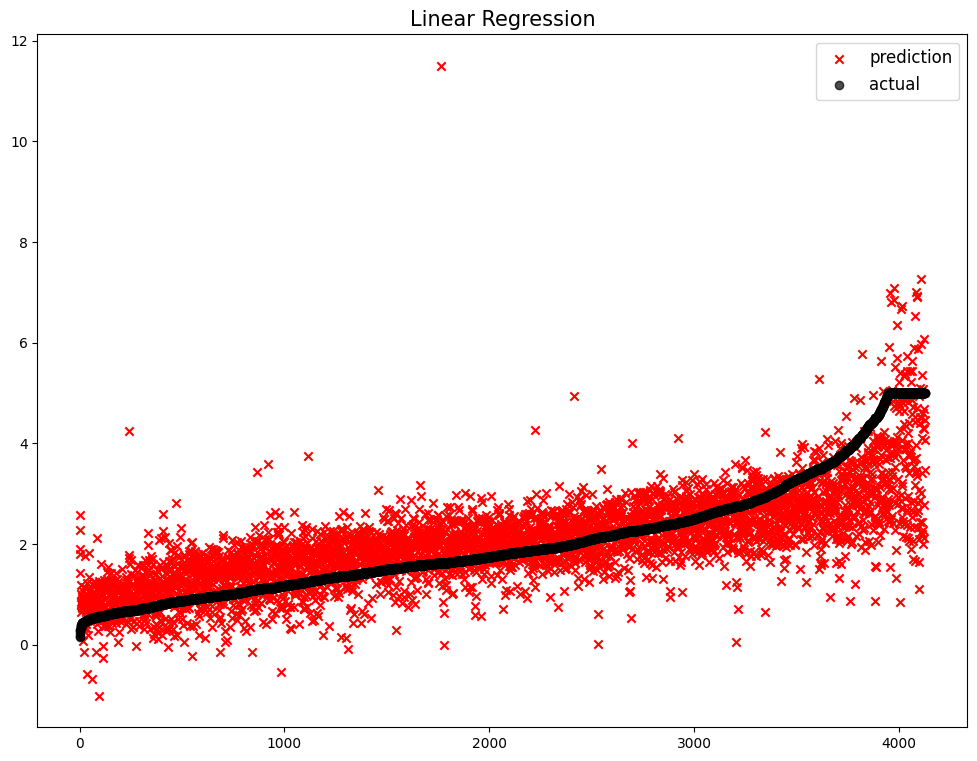

               model       mse
0  Linear Regression  0.555892


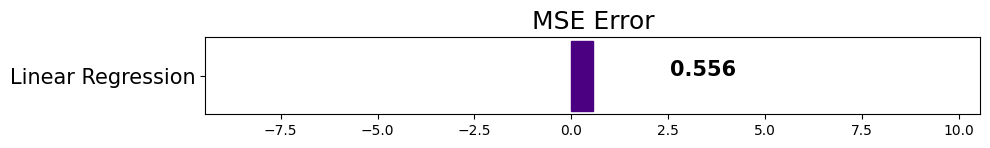

In [13]:
# 1. 모델 생성
linear_reg = LinearRegression(n_jobs=-1)

# 2. 모델 학습
linear_reg.fit(X_train, y_train)

# 3. 모델 예측
y_pred = linear_reg.predict(X_test)

# 4. 모델 평가
mse_eval('Linear Regression',y_pred, y_test)

 ### Ridge

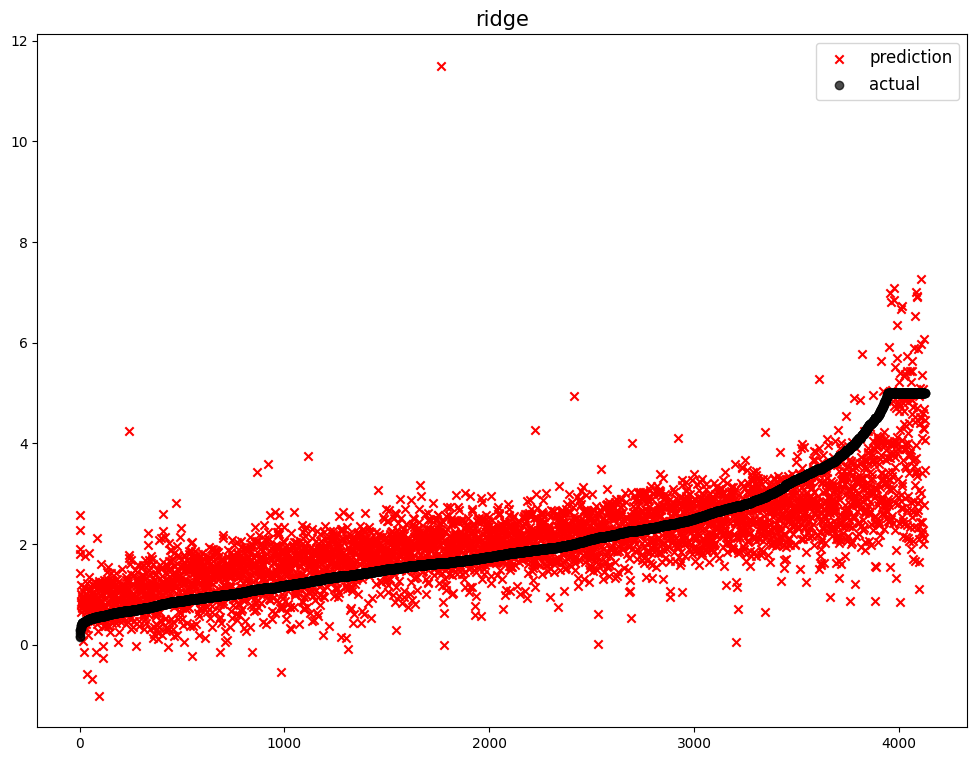

               model       mse
0  Linear Regression  0.555892
1              ridge  0.555892


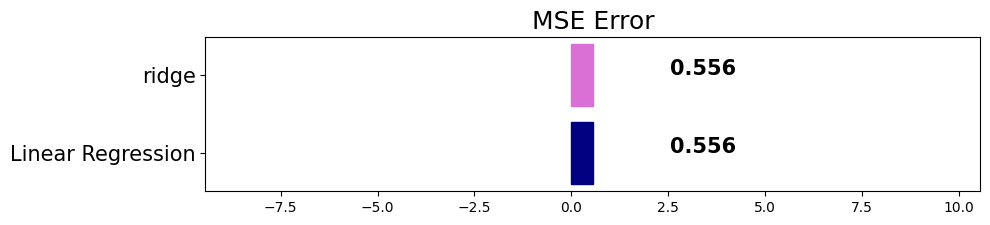

In [14]:
# 1. 모델 생성
ridge = Ridge(alpha=0.001)

# 2. 모델 학습
ridge.fit(X_train, y_train)

# 3. 모델 예측
y_pred = ridge.predict(X_test)

# 4. 모델 평가
mse_eval('ridge',y_pred, y_test)

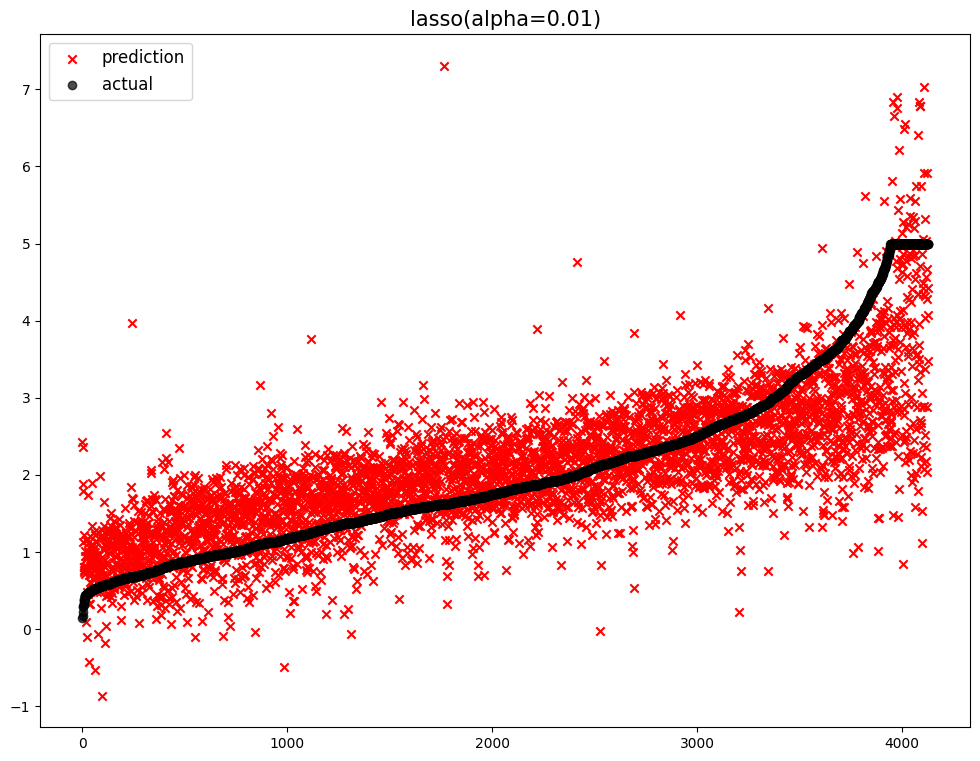

               model       mse
0  Linear Regression  0.555892
1              ridge  0.555892
2  lasso(alpha=0.01)  0.544449


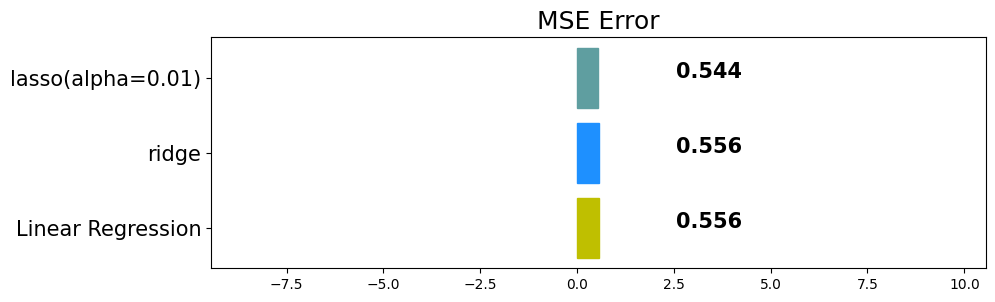

In [15]:
# 1. 모델 생성
lasso = Lasso(alpha=0.01)

# 2. 모델 학습
lasso.fit(X_train, y_train)

# 3. 모델 예측
y_pred = lasso.predict(X_test)

# 4. 모델 평가
mse_eval('lasso(alpha=0.01)',y_pred, y_test)

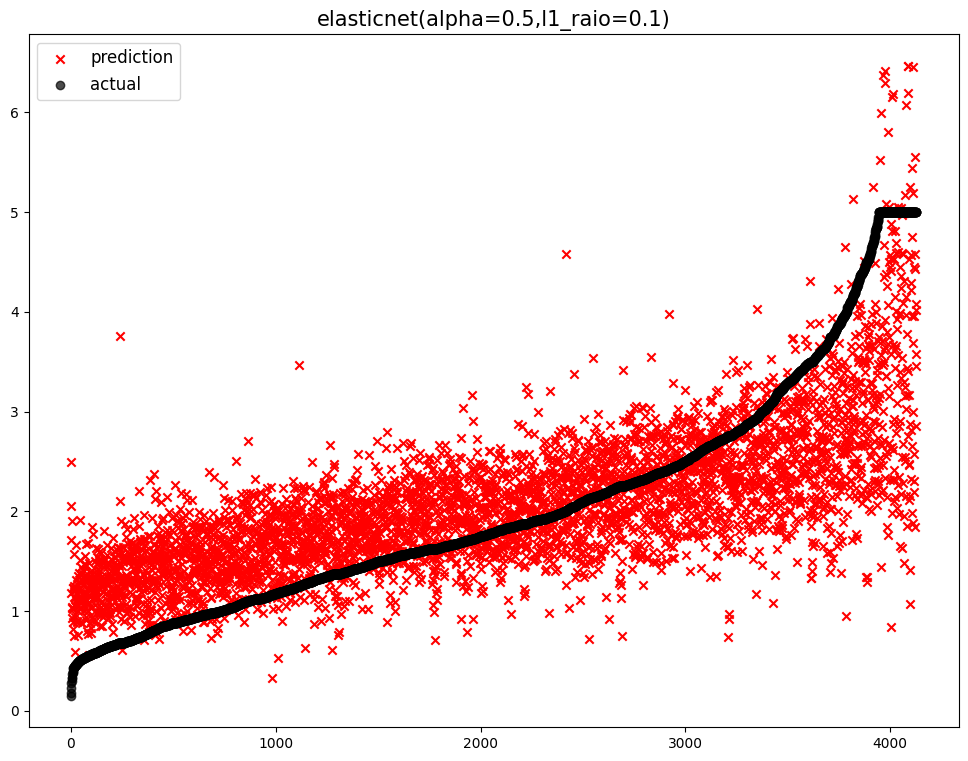

                               model       mse
0  elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1                  Linear Regression  0.555892
2                              ridge  0.555892
3                  lasso(alpha=0.01)  0.544449


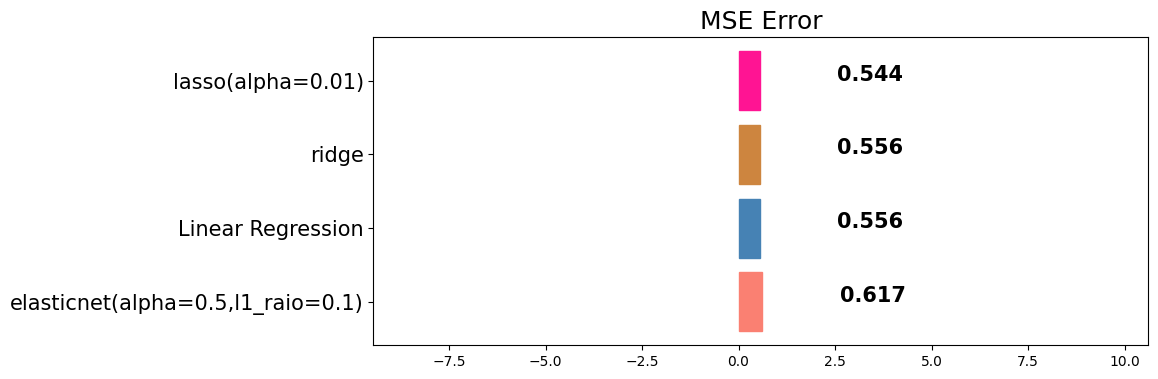

In [16]:
# 1. 모델 생성
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.1)

# 2. 모델 학습
elasticnet.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticnet.predict(X_test)

# 4. 모델 평가
mse_eval('elasticnet(alpha=0.5,l1_raio=0.1)',y_pred, y_test)

### PipeLine

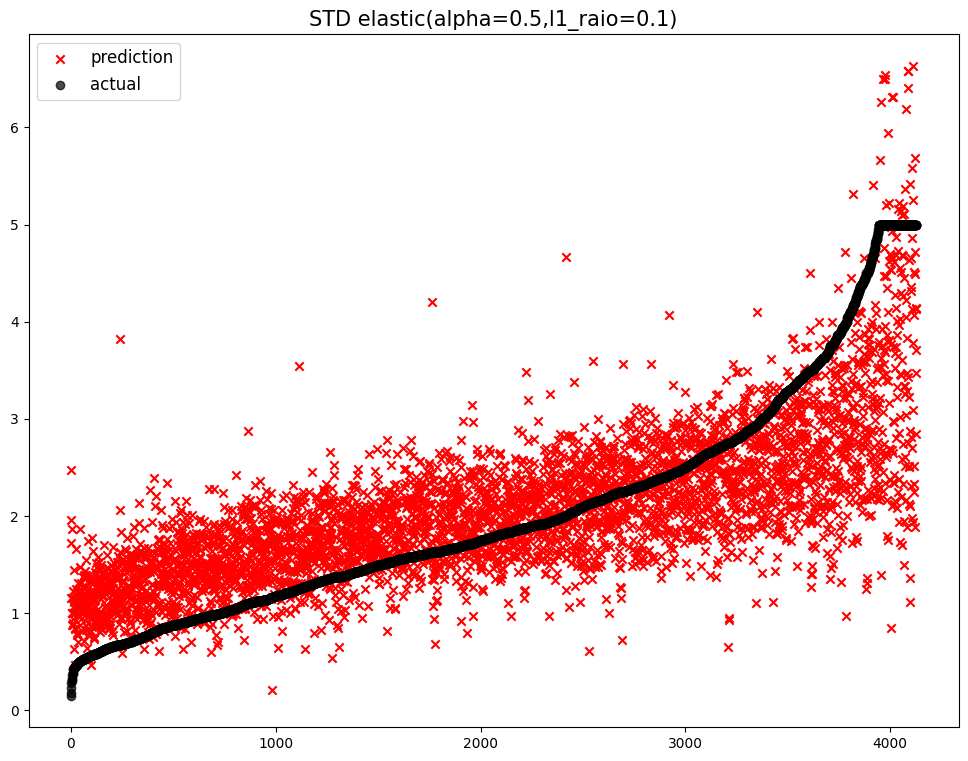

                                model       mse
0   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1  STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
2                   Linear Regression  0.555892
3                               ridge  0.555892
4                   lasso(alpha=0.01)  0.544449


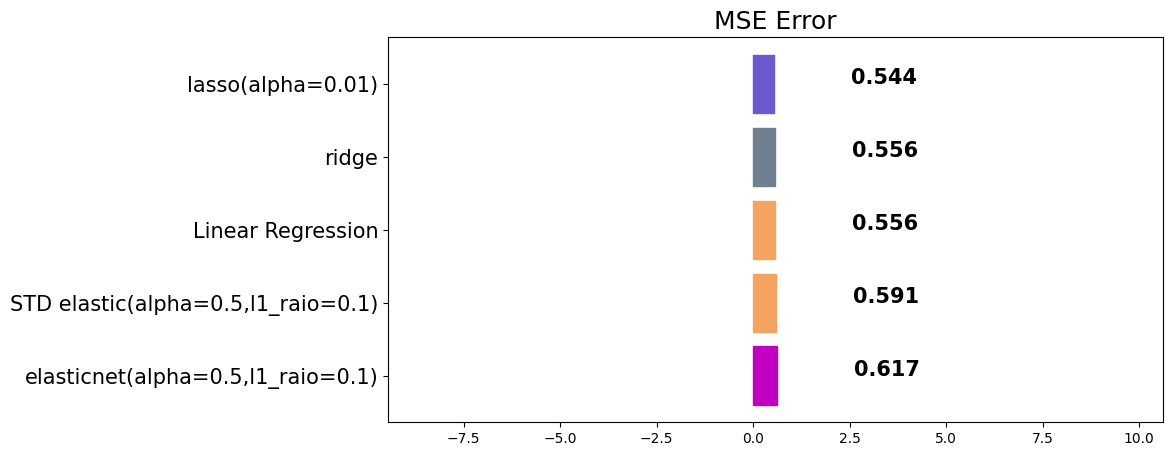

In [17]:
# 1. (파이프 라인)모델 생성
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.1)
)

# 2. 모델 학습
elasticnet_pipeline.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticnet_pipeline.predict(X_test)

# 4. 모델 평가
mse_eval('STD elastic(alpha=0.5,l1_raio=0.1)',y_pred, y_test)

## **앙상블(Ensemble)모델**

### voting Regressor

In [18]:
from sklearn.ensemble import VotingRegressor

# 앞에서 학습이 완료된 모델을 가져오기
single_models = [ 
    ('lasso', lasso),
    ('ridge', ridge),
    ('linear_reg',linear_reg),
    ('std_elastic', elasticnet_pipeline)    
]

# 1. 모델 생성
voting_reg = VotingRegressor(single_models, n_jobs=-1)

# 2. 모델 학습
voting_reg.fit(X_train, y_train)


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingRegressor`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('lasso', ...), ('ridge', ...), ...]"
,"weights weights: array-like of shape (n_regressors,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted values before averaging. Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False


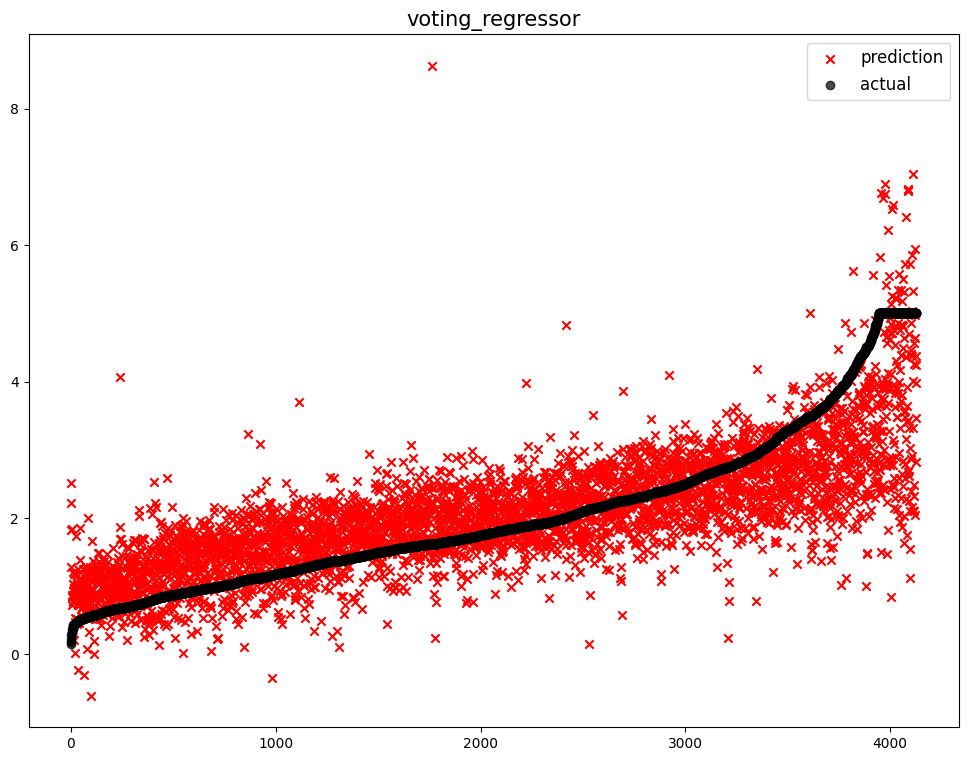

                                model       mse
0   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1  STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
2                   Linear Regression  0.555892
3                               ridge  0.555892
4                    voting_regressor  0.548854
5                   lasso(alpha=0.01)  0.544449


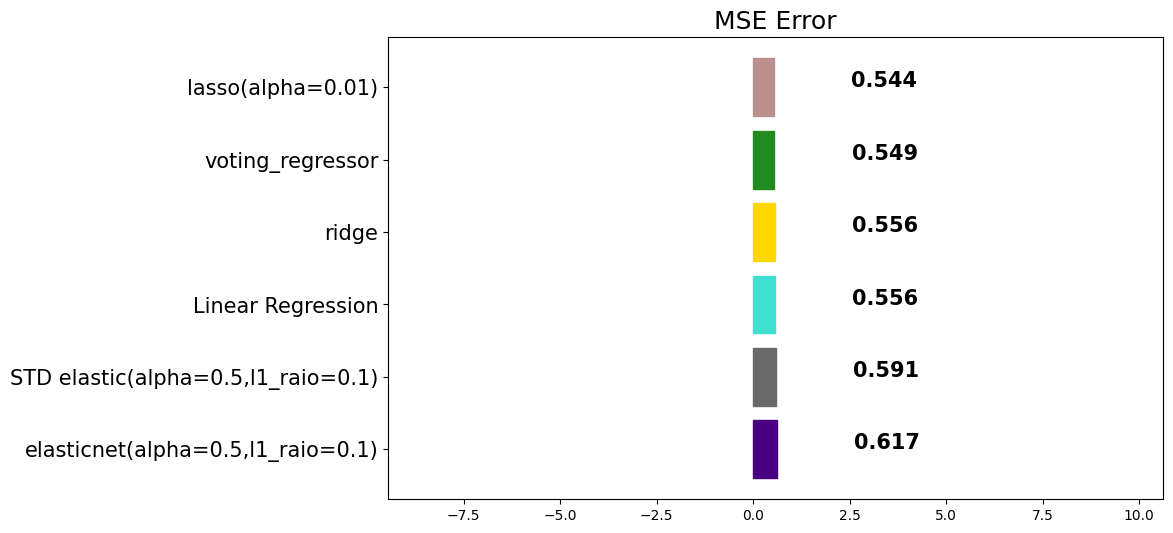

In [19]:
# 3. 모델 예측
y_pred = voting_reg.predict(X_test)

# 4. 모델 평가
mse_eval('voting_regressor',y_pred, y_test)

### Bagging 방식의 ensemble

Bootstrap AGGregatING : BAGGING

#### random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

# 1. 모델 생성
rf_reg = RandomForestRegressor()

# 2. 모델 학습
rf_reg.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

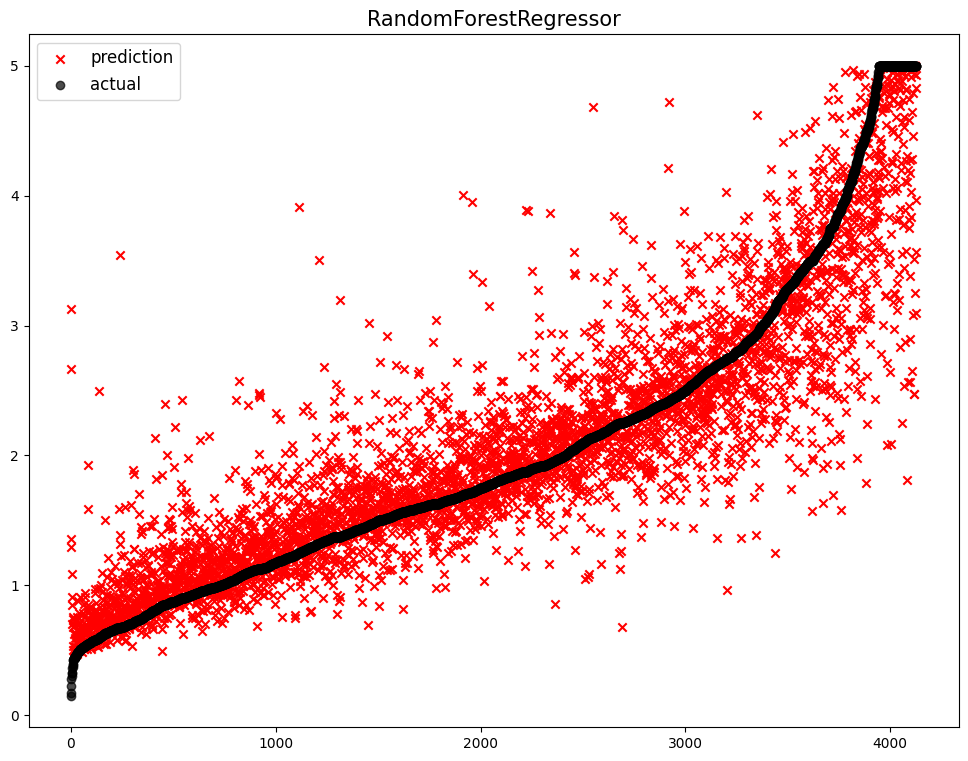

                                model       mse
0   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1  STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
2                   Linear Regression  0.555892
3                               ridge  0.555892
4                    voting_regressor  0.548854
5                   lasso(alpha=0.01)  0.544449
6               RandomForestRegressor  0.255911


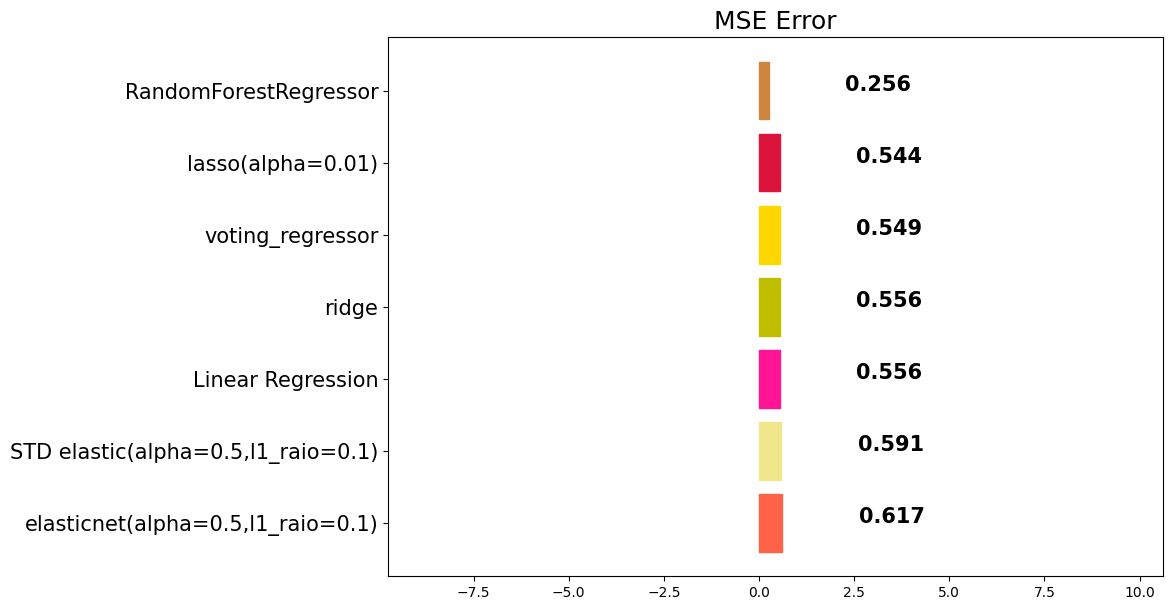

In [21]:
# 3. 모델 예측
y_pred = rf_reg.predict(X_test)

# 4. 모델 평가
mse_eval('RandomForestRegressor', y_pred, y_test)

### GridSearchCV로 rf_reg를 하이퍼파라메터 튜닝

**나중에 다음과 같은 라이브러리도 사용해 보기를 권장**<br>
AutoML 또는 자동 하이퍼파라메터 튜닝 : Optuna, H2O, Autogluon(AWS)

In [22]:
from sklearn.model_selection import GridSearchCV

# 1. RF 모델 생성
rf_reg_cv = RandomForestRegressor(random_state=42)
param_grid = { # 5*7=35가지 조합 학습하고 비교
    'n_estimators': [500,600,700,800,900],
    'max_depth': [None]
    }
# GridSearchCV 모델 생성 
grid_rg_reg = GridSearchCV(rf_reg_cv, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 2. 모델 학습
grid_rg_reg.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None], 'n_estimators': [500, 600, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also 

In [23]:
print('GridSearch 최적 파라미터: ', grid_rg_reg.best_params_)
print('GridSearch 최고 점수: ', grid_rg_reg.best_score_)

GridSearch 최적 파라미터:  {'max_depth': None, 'n_estimators': 500}
GridSearch 최고 점수:  -0.2587203472379897


In [77]:
# grid_rg_reg.best_params 로 모델을 가져 오기
grid_rg_reg = grid_rg_reg.best_estimator_


y_pred = grid_rg_reg.predict(X_test)



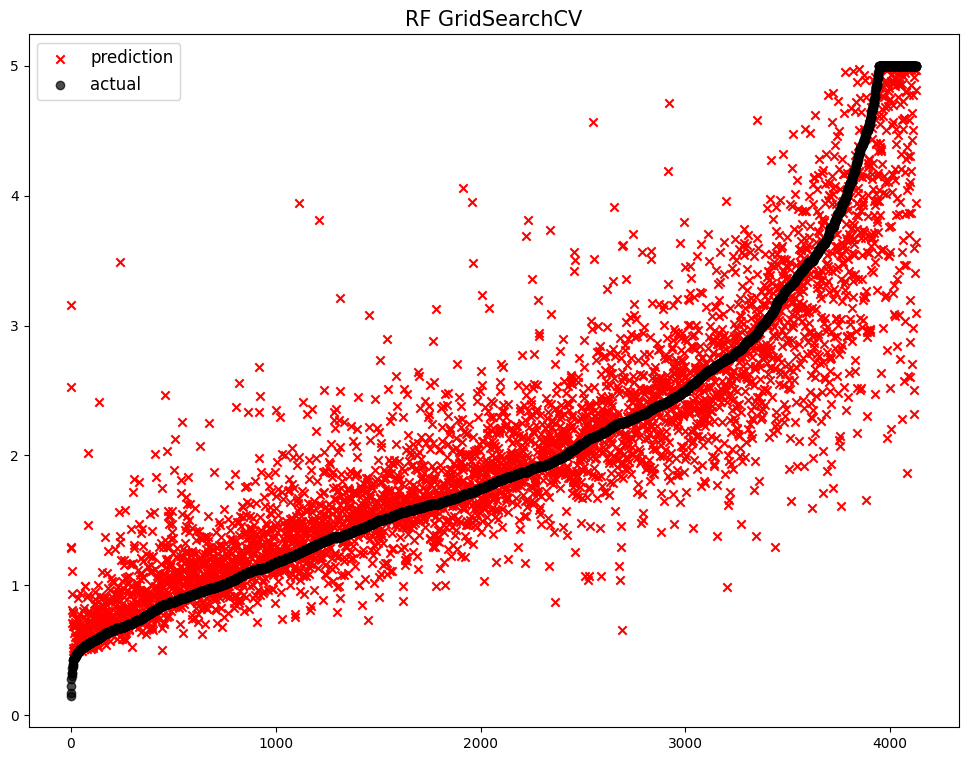

                                 model       mse
0    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1        HistGradientBoostingRegressor  0.606615
2   STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
3                    Linear Regression  0.555892
4                                ridge  0.555892
5                     voting_regressor  0.548854
6                    lasso(alpha=0.01)  0.544449
7                RandomForestRegressor  0.255911
8                      RF GridSearchCV  0.252164
9                              xgb_reg  0.234476
10                   stacking Ensemble  0.211221
11                            lgbm_reg  0.191147


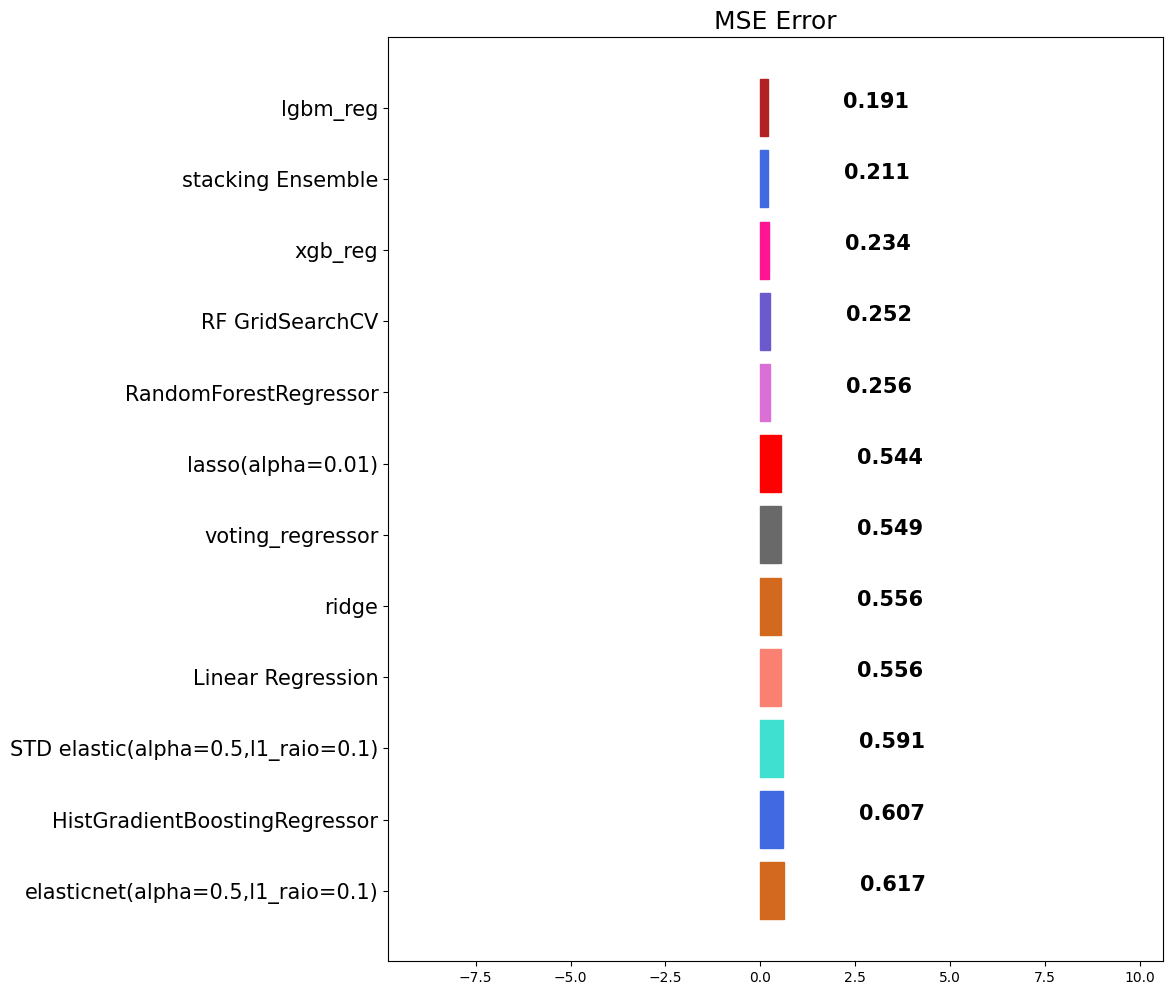

In [78]:
# 3. 모델 예측
y_pred = grid_rg_reg.predict(X_test)

# 4. 모델 평가
mse_eval('RF GridSearchCV', y_pred, y_test)

### 부스팅(Boosting)
* 부스팅은 여러개의 약한 학습기를 순차적으로 학습시켜서 최종적으로 강한 학습기를 만드는 방법.
* 장점 : 성능이 뛰어나고, 별도의 특성 선택이 필요하지 않음.
* 단점 : 잘못된 레이블이나, 이상치에 민감할 수 있다. -> 과적합(overfitting)이 발생

종류 : GBM, AdaBoost, XGBoost, LightGBM

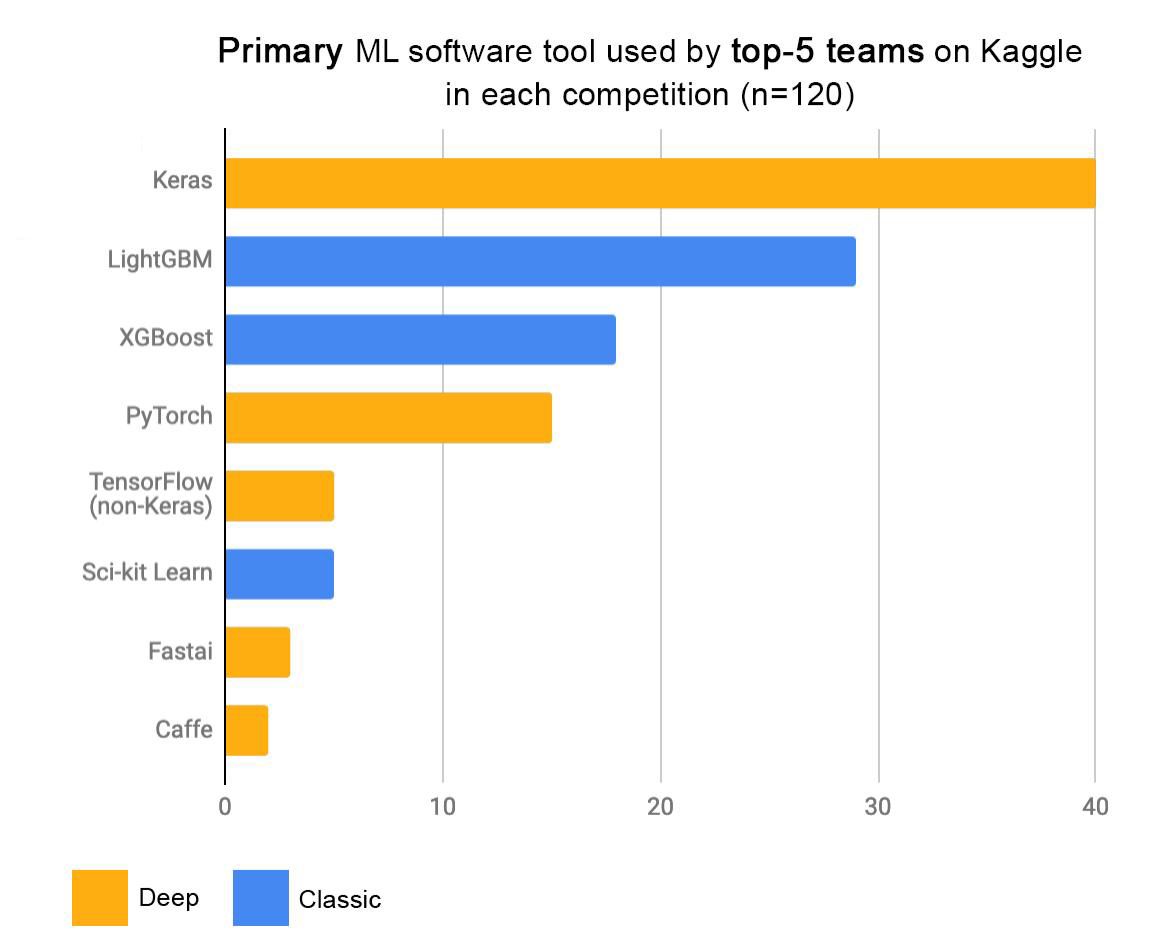

In [25]:
from IPython.display import Image
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=700)

### GBM

In [52]:
from sklearn.ensemble import HistGradientBoostingRegressor

# 1.모델 생성
# gbr = HistGradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbr = HistGradientBoostingRegressor(max_depth=2, max_iter=200, learning_rate=0.01, random_state=42)

# 2.모델 학습
gbr.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'}, default='squared_error'The loss function to use in the boosting process. Note that the""squared error"", ""gamma"" and ""poisson"" losses actually implement""half least squares loss"", ""half gamma deviance"" and ""half poissondeviance"" to simplify the computation of the gradient. Furthermore,""gamma"" and ""poisson"" losses internally use a log-link, ""gamma""requires ``y > 0`` and ""poisson"" requires ``y >= 0``.""quantile"" uses the pinball loss... versionchanged:: 0.23 Added option 'poisson'... versionchanged:: 1.1 Added option 'quantile'... versionchanged:: 1.3 Added option 'gamma'.",'squared_error'
,"quantile quantile: float, default=NoneIf loss is ""quantile"", this parameter specifies which quantile to be estimatedand must be between 0 and 1.",None
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.01
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees.",200
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",2
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide ` and:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_categorical.py`... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.

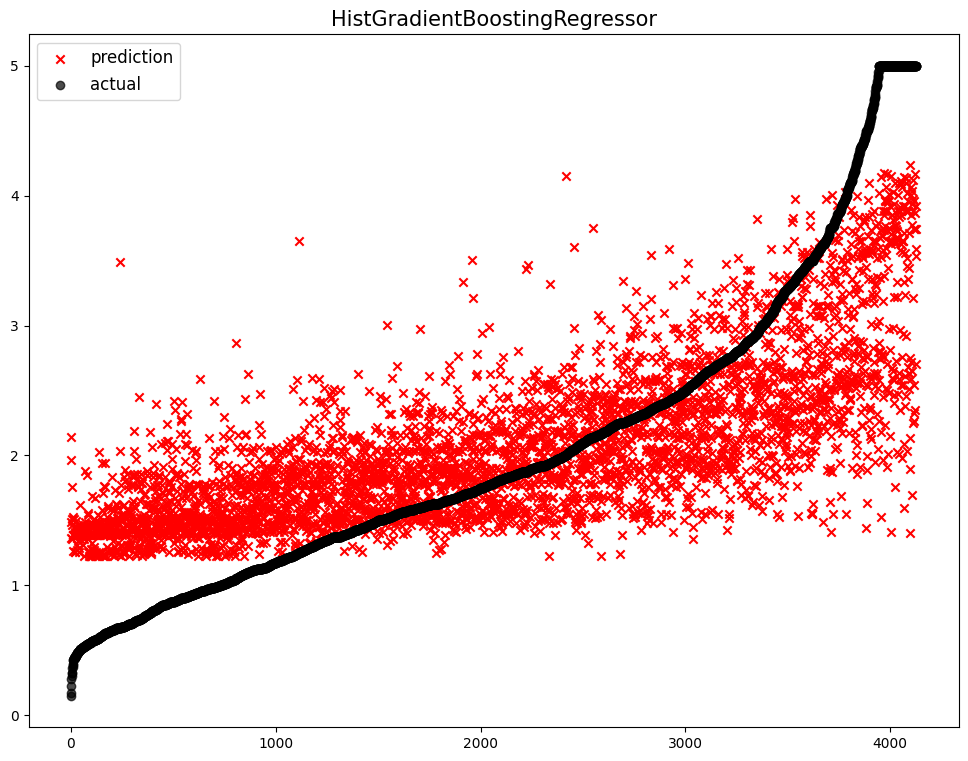

                                model       mse
0   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1       HistGradientBoostingRegressor  0.606615
2  STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
3                   Linear Regression  0.555892
4                               ridge  0.555892
5                    voting_regressor  0.548854
6                   lasso(alpha=0.01)  0.544449
7               RandomForestRegressor  0.255911
8                     RF GridSearchCV  0.252164


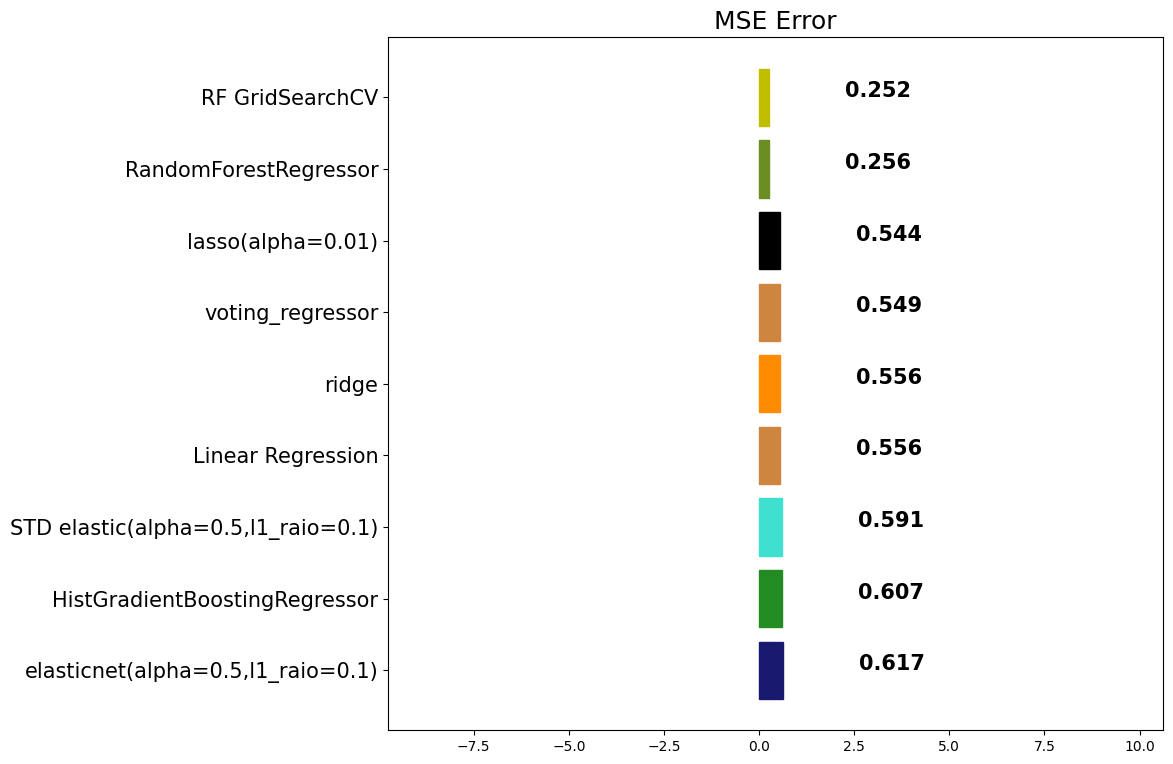

In [53]:
# 3. 모델 예측
y_pred = gbr.predict(X_test)

# 4. 모델 평가
mse_eval('HistGradientBoostingRegressor', y_pred, y_test)

### 연습용 데이터셋을 만들어 GBM시각화

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

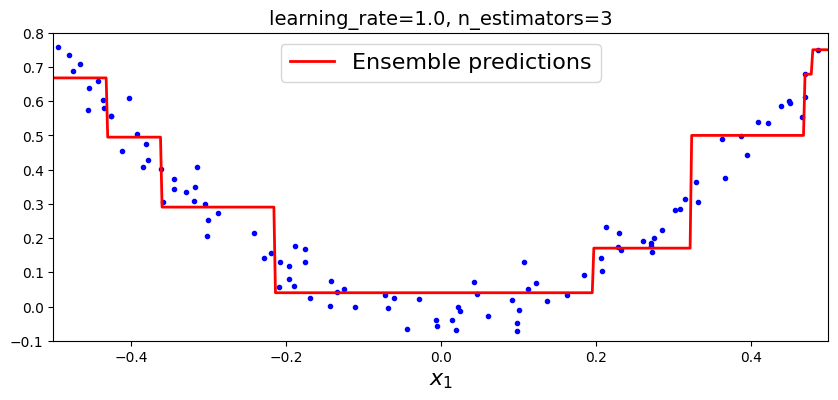

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# 1. 함수 직접 정의 (확실한 실행을 위해)
def plot_tree_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)  # 데이터 점 그리기
    plt.plot(x1, y_pred, style, linewidth=2, label=label) # 예측 선 그리기
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# 2. 데이터 생성
np.random.seed(42)
X_simple = np.random.rand(100, 1) - 0.5
y_simple = 3 * X_simple[:, 0]**2 + 0.05 * np.random.randn(100)

# 3. 모델 학습
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_simple, y_simple)

# 4. 그래프 그리기
plt.figure(figsize=(10, 4))
plot_tree_predictions([gbrt], X_simple, y_simple, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show() # 그래프 출력

### XGBoost

In [ ]:
# xgboost는 sklearn안에 기본 알고리즘이 아니다.
!pip install xgboost

In [56]:
# XGBoost
from xgboost import XGBRegressor

# 1. 모델 생성
xgb_reg = XGBRegressor(random_state=42, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8)

# 2. 모델 학습
xgb_reg.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

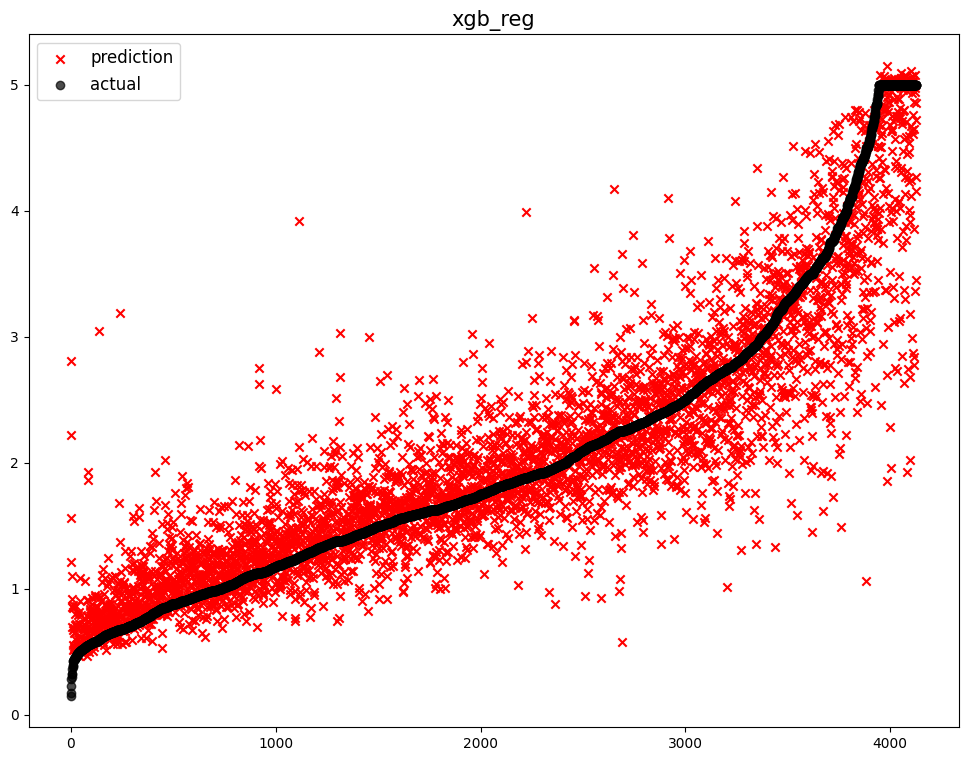

                                model       mse
0   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1       HistGradientBoostingRegressor  0.606615
2  STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
3                   Linear Regression  0.555892
4                               ridge  0.555892
5                    voting_regressor  0.548854
6                   lasso(alpha=0.01)  0.544449
7               RandomForestRegressor  0.255911
8                     RF GridSearchCV  0.252164
9                             xgb_reg  0.234476


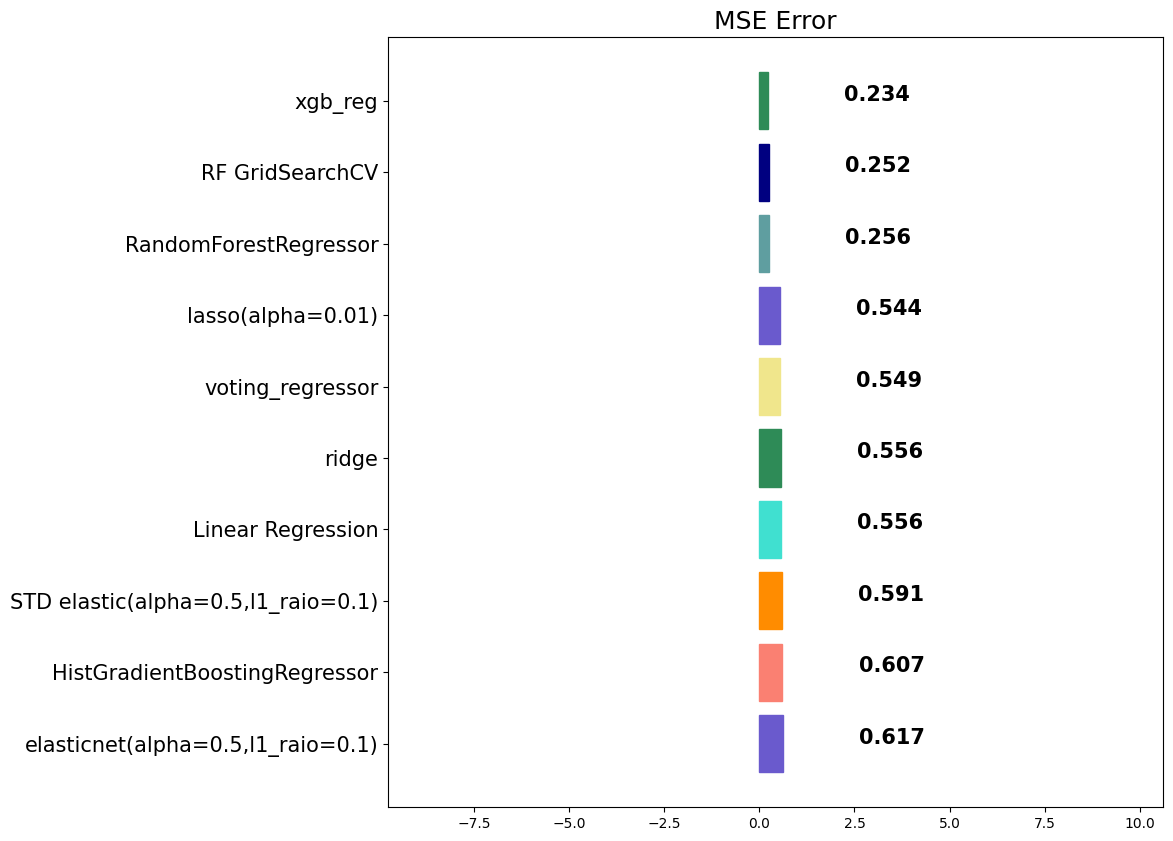

In [57]:
# 3. 모델 예측
y_pred = xgb_reg.predict(X_test)

# 4. 모델 평가
mse_eval('xgb_reg', y_pred, y_test)

### LGBM Regressor

In [59]:
!pip install lightgbm

In [74]:
from lightgbm import LGBMRegressor

# 1. 모델 생성
lgbm_reg = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    # 아래 파라미터들을 하나씩 조정해 보세요
    num_leaves=31,            # 늘리면 더 복잡한 모델 (너무 크면 과적합 주의)
    min_child_samples=10,     # 줄이면 더 미세한 분기 가능 (기본값 20)
    min_child_weight=0.001,   # 줄이면 더 작은 단위로 분기
    verbose=-1                # 경고 메시지를 숨기고 싶을 때 사용
)

# 2. 모델 학습
lgbm_reg.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,1000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,10


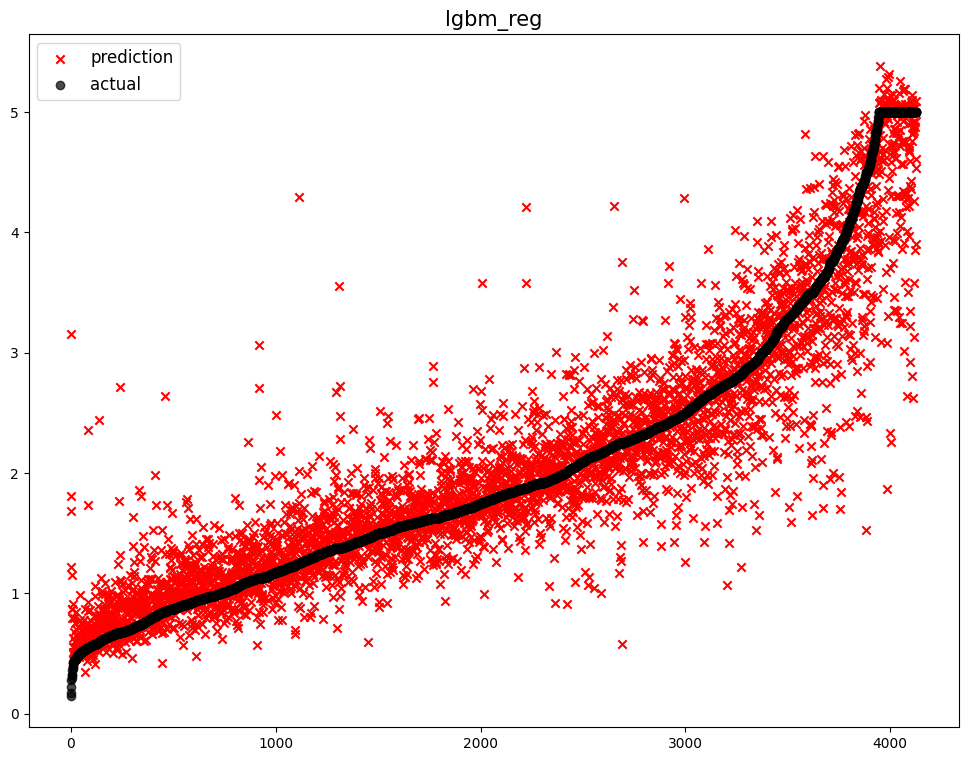

                                 model       mse
0    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1        HistGradientBoostingRegressor  0.606615
2   STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
3                    Linear Regression  0.555892
4                                ridge  0.555892
5                     voting_regressor  0.548854
6                    lasso(alpha=0.01)  0.544449
7                RandomForestRegressor  0.255911
8                      RF GridSearchCV  0.252164
9                              xgb_reg  0.234476
10                            lgbm_reg  0.191147


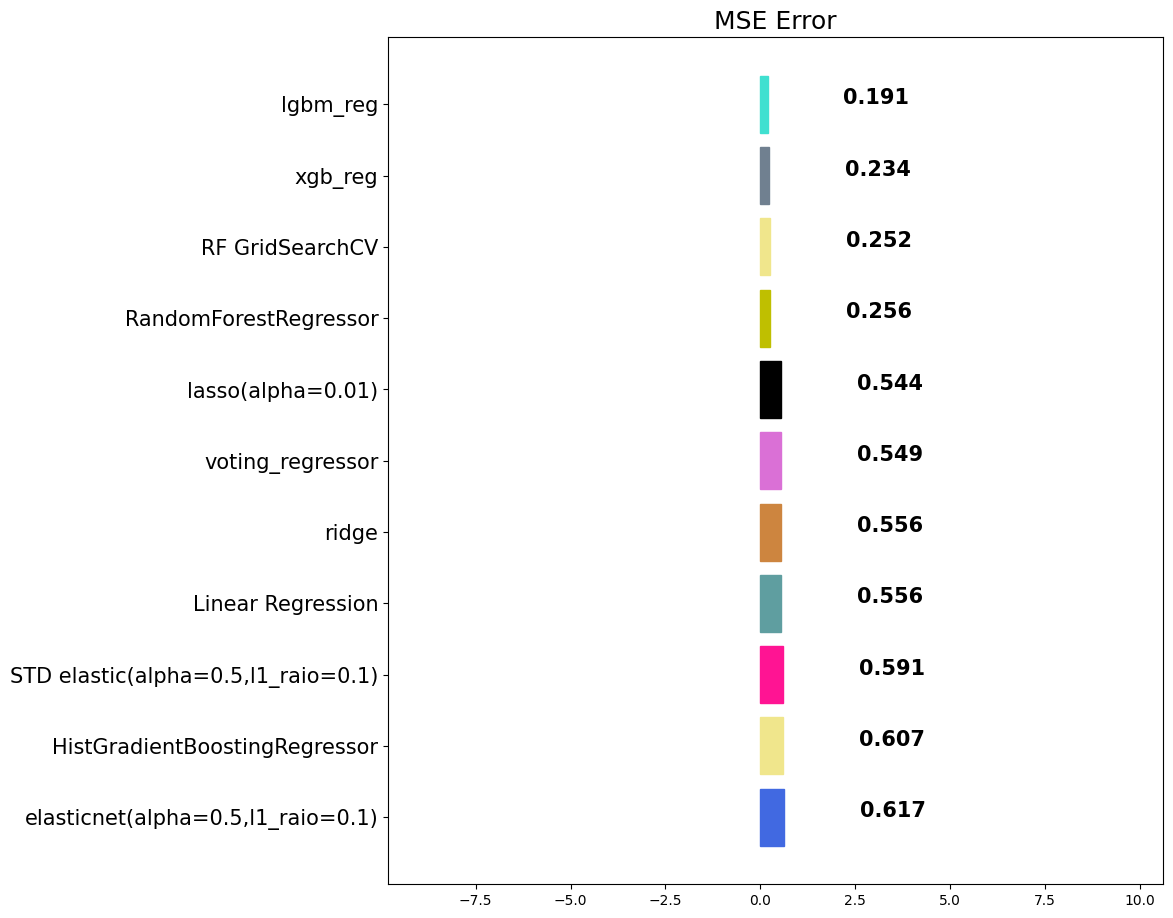

In [75]:
# 3. 모델 예측
y_pred = lgbm_reg.predict(X_test)

# 4. 모델 평가
mse_eval('lgbm_reg', y_pred, y_test)

### Stacking
* 개별 모델이 예측한 데이터를 기반으로 최종 예측기가 종합하여 예측한다.
* 데이터셋이 적은 경우 과대 적합(over-fitting)이 발생할 수 있다.(데이터셋이 상대적으로 커야 한다.)

c:\Users\ailee\miniconda3\envs\DS\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


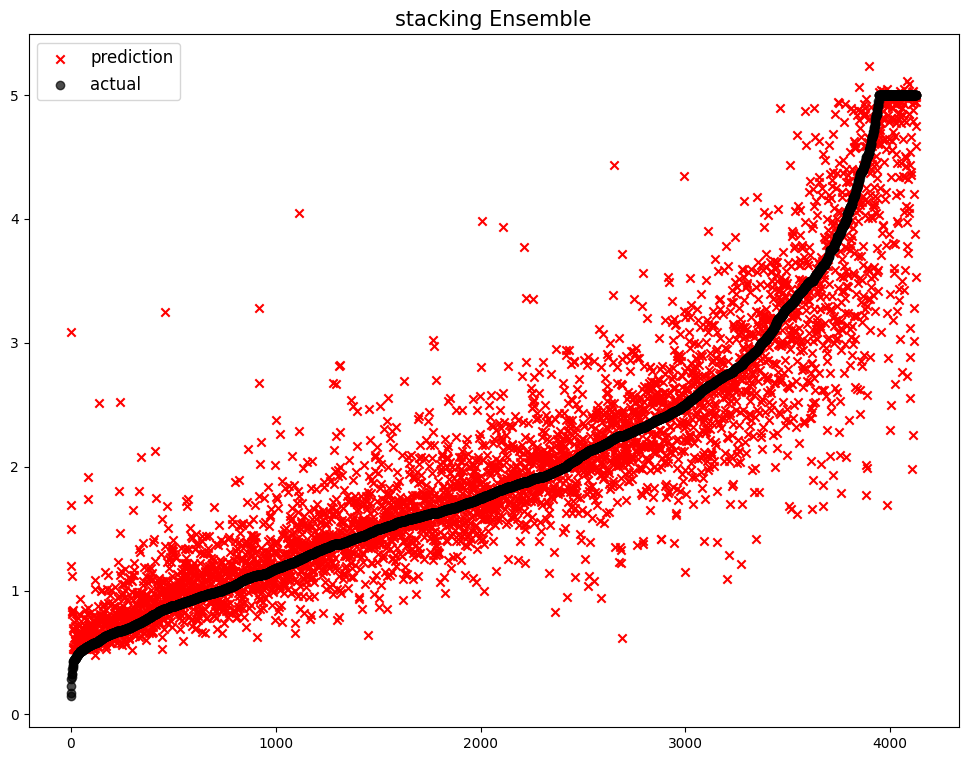

                                 model       mse
0    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1        HistGradientBoostingRegressor  0.606615
2   STD elastic(alpha=0.5,l1_raio=0.1)  0.590975
3                    Linear Regression  0.555892
4                                ridge  0.555892
5                     voting_regressor  0.548854
6                    lasso(alpha=0.01)  0.544449
7                RandomForestRegressor  0.255911
8                      RF GridSearchCV  0.252164
9                              xgb_reg  0.234476
10                   stacking Ensemble  0.211221
11                            lgbm_reg  0.191147


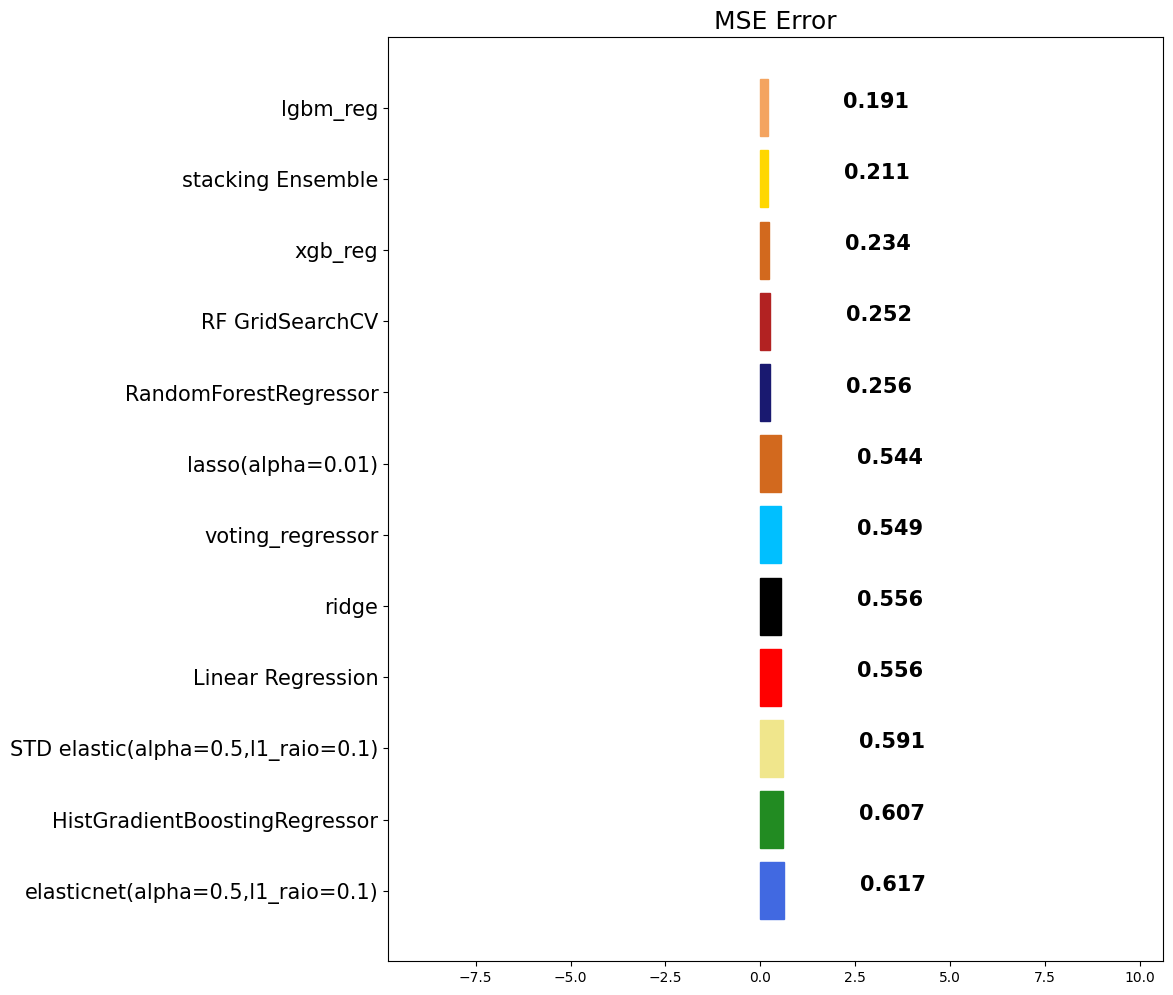

In [76]:
from typing import final
# stacking Model -> 서로 다른 모델들을 개별모델(전단 예측기)로 사용 할 수 있다.
from sklearn.ensemble import StackingRegressor

stack_models =[
    ('lgbm', lgbm_reg),
    ('xgb', xgb_reg),
    ('rf', rf_reg),
    ('gbr', gbr)
]

# 1. 모델 생성
stack_reg = StackingRegressor(estimators=stack_models, final_estimator=lgbm_reg)

# 2. 모델 학습
stack_reg.fit(X_train, y_train)

# 3. 모델 예측
y_pred = stack_reg.predict(X_test)

# 4 모델 평가
mse_eval('stacking Ensemble', y_pred, y_test)